**Table of contents**<a id='toc0_'></a>    
- [Classification of MNIST Digits with SVD Decomposition.](#toc1_)    
  - [Data manipulation and exploration](#toc1_1_)    
  - [Computing SVD](#toc1_2_)    
  - [Single classification](#toc1_3_)    
  - [All couples classification](#toc1_4_)    
  - [Triad classification](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

#  [&#8593;](#toc0_) <a id='toc1_'></a>Classification of MNIST Digits with SVD Decomposition.
The task for this exercise is to learn the classification of MNIST digits by using SVD decomposition.
Remember that, Given a matrix $X \in R^{m×n}$ and its SVD decomposition $X = U S V^T$ we can prove that
an orthogonal base for the space of the columns is given by the first $p$ columns of the matrix $U$ , where
$p = rank(X)$ is equal to the number of non-zero singular values of $A$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
VERBOSITY = 0

##  [&#8593;](#toc0_) <a id='toc1_1_'></a>Data manipulation and exploration

Load the MNIST dataset contained in `./data.csv` with the function `scipy.io.loadmat`.
This dataset, which is loaded in the form of a $748 × 42000$ matrix $X$, contains the flattened version
of $42000$  $28 × 28$ grayscale handwritten digits.

In [2]:
#X = scipy.io.loadmat('./mnist.mat')
X = np.array(pd.read_csv('./data.csv'))

m,n = 28,28

labels = X[:,0]
X = X[:,1:]
print(f'X.shape = {X.shape}')

X.shape = (42000, 784)


Visualize a bunch of datapoints of $X$ with the function ``plt.imshow``.

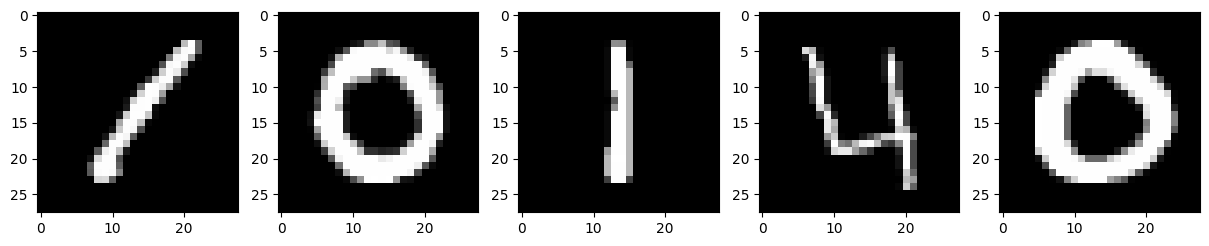

In [3]:
plt.figure(figsize=(15,15))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X[i].reshape((m,n)), cmap='gray')

Extract from $X$ those columns that corresponds to digits $3$ or $4$. Those digits represents the
classes $C_1$ and $C_2$ defined above.

In [4]:
C_1 = X[labels == 3]
C_2 = X[labels == 4]

s1 = C_1.shape[0]
s2 = C_2.shape[0]

Split the obtained dataset in training and testing. From now on, we will only consider the training
set. The test set will be only used at the end of the exercise to test the algorithm.

In [5]:
training_perc = 0.67
training_num = int(training_perc * len(C_1))

C_1_train = C_1[:training_num]
C_1_test = C_1[training_num:]
C_2_train = C_2[:training_num]
C_2_test = C_2[training_num:]


Create the matrices $X_1$ and $X_2$ defined as:

Suppose that $s_1$ is the number of elements in $C_1$, while $s_2$ is the number of elements in $C_2$.

$X_1 \in R^{mn×s_1}$ is the matrix such that its columns are a flatten version of each digit in $C_1$, $X_2 \in R^{mn×s_2}$
is the matrix such that its columns are a flatten version of each digit in C2


In [6]:
# C_1 and C_2 are already flattened, in fact to plot we do .reshape(n,n)
X1 = C_1_train.T
X2 = C_2_train.T

print(X1.shape)
print((m*n, int(s1 * training_perc)))

(784, 2915)
(784, 2915)


##  [&#8593;](#toc0_) <a id='toc1_2_'></a>Computing SVD

Compute the SVD decomposition of $X_1$ and $X_2$ with `np.linalg.svd(matrix, full matrices=False)` and denote the $U$-part of the two decompositions as $U_1$ and $U_2$

In [43]:
# QUA SENZA FULL_MATRICES=FALSE NON FUNZIONA
print(X1.shape)
U1, s1, VT1 = np.linalg.svd(X1,full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2,full_matrices=False)
print(U1.shape)

(784, 2915)
(784, 784)


Take an unknown digit $y$ from the test set, and compute ${y_1}^⊥ = U_1({U_1}^T y)$ and ${y_2}^⊥ = U_2({U_2}^T y)$

(784,)


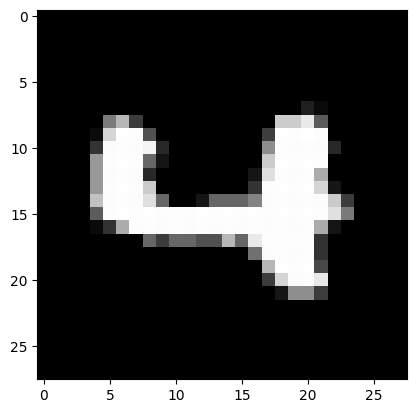

In [45]:
y = C_2_train[51]
y1_proj = U1 @ (U1.T @ y)
y2_proj = U2 @ (U2.T @ y)

# Plotting y to see the expected result
print(y.shape)
plt.imshow(y.reshape((m,n)), cmap='gray');
plt.show()

##  [&#8593;](#toc0_) <a id='toc1_3_'></a>Single classification

Compute the distances $d_1 = ||y − {y_1}^⊥ ||_2$ and $d_2 = ||y − {y_2}^⊥ ||_2$ and classify $y$ to $C_1$ if $d_1 < d_2$ and to $C_2$ if $d_2 < d_1$.

**Computing the distance between the projection $y^⊥$ and $y$ gives us an estimate of how much the $y$ vector is close to the other vectors in the subspace $U$ we are projecting to. If this distance is lower, it probably means that the $y$ belongs to the same labels of the vectors of the subspace $U$ compared to other subspaces rapresenting other labels.**

**If the distance is exactly $0$ it means that $y^⊥ = y$ so $y$ already belongs to the subspace $U$.**

In [46]:
d1 = np.linalg.norm(y-y1_proj,2)
d2 = np.linalg.norm(y-y2_proj,2)

if d1 < d2:
    print("y is classified as a 3 (C1)")
else:
    print("y is classified as a 4 (C2)")

print(f"d1= {d1}")
print(f"d2= {d2}")

y is classified as a 4 (C2)
d1= 4.202841932395237e-12
d2= 3.4940004503744302e-12


Repeat the experiment for different values of $y$ in the test set. Compute the misclassification
number for this algorithm.

In [47]:
def classify(x,U1,U2,a,b):
    x1_proj = U1 @ (U1.T @ x)
    x2_proj = U2 @ (U2.T @ x)

    d1 = np.linalg.norm(x-x1_proj,2)
    d2 = np.linalg.norm(x-x2_proj,2)

    if d1 < d2:
        return a
    else:
        return b
    
correct_test = 0
correct_train = 0

correct_test += sum([classify(c1,U1,U2,3,4) == 3 for c1 in C_1_test])
correct_test += sum([classify(c2,U1,U2,3,4) == 4 for c2 in C_2_test])

correct_train += sum([classify(c1,U1,U2,3,4) == 3 for c1 in C_1_train])
correct_train += sum([classify(c2,U1,U2,3,4) == 4 for c2 in C_2_train])

print(f"Test set accuracy = {100 * correct_test / (len(C_1_test) + len(C_2_test)):.2f} %")
print(f"Train set accuracy = {100 * correct_train / (len(C_1_train) + len(C_2_train)):.2f} %")
    

Test set accuracy = 97.34 %
Train set accuracy = 98.11 %


**The test set accuracy and the train set accuracy are pretty similar, so in this particular case, we don't see overfitting or underfitting.** 

##  [&#8593;](#toc0_) <a id='toc1_4_'></a>All couples classification

Repeat the experiment for different digits other than 3 or 4. There is a relationship between the
visual similarity of the digits and the classification error?

In [11]:
# Returns true if X is closer to U1 than U2
def classify_matrix(X,U1,U2):
    x_1_proj = U1 @ (U1.T @ X)
    x_2_proj = U2 @ (U2.T @ X)

    d1 = np.linalg.norm(X-x_1_proj,2,axis=0)
    d2 = np.linalg.norm(X-x_2_proj,2,axis=0)
    
    return d1 <= d2

training_perc = 0.67
SVD_CACHE = {}
def correct_ratio_2_number_classification(a,b):
    C_1_train = X[labels == a][:int(training_perc * len(X[labels == a]))]
    C_2_train = X[labels == b][:int(training_perc * len(X[labels == b]))]

    if a in SVD_CACHE:
        U1, s1, VT1 = SVD_CACHE[a]
    else:
        U1, s1, VT1 = np.linalg.svd(C_1_train.T,full_matrices=True)
        SVD_CACHE[a] = U1, s1, VT1
        
    if b in SVD_CACHE:        
        U2, s2, VT2 = SVD_CACHE[b]
    else:
        U2, s2, VT2 = np.linalg.svd(C_2_train.T,full_matrices=True)
        SVD_CACHE[b] = U2, s2, VT2    

    C_1_test = X[labels == a][int(training_perc * len(X[labels == a])):]
    C_2_test = X[labels == b][int(training_perc * len(X[labels == b])):]

    guess_1 = classify_matrix(C_1_test.T,U1,U2)
    guess_2 = classify_matrix(C_2_test.T,U2,U1)

    correct = np.sum(guess_1) + np.sum(guess_2)
    
    return correct / (len(C_1_test) + len(C_2_test))

couple_accuracy = np.zeros((10,10))
done = 0

for i in (tqdm(range(10)) if VERBOSITY else range(10)):
    for j in range(10):
        couple_accuracy[i,j] = correct_ratio_2_number_classification(i,j)

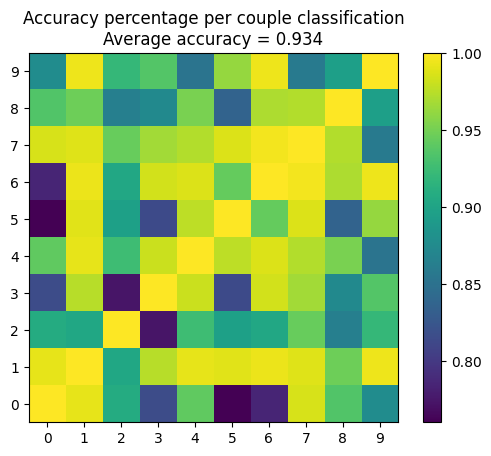

In [14]:
plt.imshow(couple_accuracy)
plt.gca().invert_yaxis()
plt.locator_params(nbins=10)
plt.title('Accuracy percentage per couple classification\nAverage accuracy = {:.3f}'.format(np.mean(couple_accuracy)))
plt.colorbar();

**This graph clearly shows that similar digits, like $(3,2), (5,0)$ or $(6,0)$, have a lower value of accuracy.**

##  [&#8593;](#toc0_) <a id='toc1_5_'></a>Triad classification

The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than
2 classes (say, $k$ different classes) $C_1, \dots , C_k$, we just need to repeat the same procedure as before for
each matrix $X_1, \dots , X_k$ to obtain the distances $d_1, \dots , d_k$. Then, the new digit $y$ will be classified as $C_i$ if $d_i$ is lower that $d_j$ for each $j = 1, \dots , k$.
Repeat the exercise above with a 3-digit example. Comment the differences.

In [13]:
# a,b,c are the classes of number
# x is the number to classify
training_perc = 0.67

SVD_CACHE = {}
# Returns the three U of the SVDs of the three classes
def pvd_precomp(a,b,c):
    C_1 = X[labels == a][:int(training_perc * len(X[labels == a]))]
    C_2 = X[labels == b][:int(training_perc * len(X[labels == b]))]
    C_3 = X[labels == c][:int(training_perc * len(X[labels == c]))]

    if a in SVD_CACHE:
        U1, s1, VT1 = SVD_CACHE[a]
    else:
        U1, s1, VT1 = np.linalg.svd(C_1.T,full_matrices=True)
        SVD_CACHE[a] = U1, s1, VT1
    
    if b in SVD_CACHE:
        U2, s2, VT2 = SVD_CACHE[b]
    else:
        U2, s2, VT2 = np.linalg.svd(C_2.T,full_matrices=True)
        SVD_CACHE[b] = U2, s2, VT2
        
    if c in SVD_CACHE:
        U3, s3, VT3 = SVD_CACHE[c]
    else:
        U3, s3, VT3 = np.linalg.svd(C_3.T,full_matrices=True)
        SVD_CACHE[c] = U3, s3, VT3
    
    return U1,U2,U3

def classify_three(U1,U2,U3,x):
    y1_proj = U1 @ (U1.T @ x)
    y2_proj = U2 @ (U2.T @ x)
    y3_proj = U3 @ (U3.T @ x)

    d1 = np.linalg.norm(x-y1_proj,2)
    d2 = np.linalg.norm(x-y2_proj,2)
    d3 = np.linalg.norm(x-y3_proj,2)

    m = min(d1,d2,d3)

    if m == d1:
        return a
    elif m == d2:
        return b
    elif m == d3:
        return c

a,b,c = 2,3,5
test_a = X[labels == a][int(training_perc * len(X[labels == a])):]
test_b = X[labels == b][int(training_perc * len(X[labels == b])):]
test_c = X[labels == c][int(training_perc * len(X[labels == c])):]

U1,U2,U3 = pvd_precomp(a,b,c)

correct = 0
correct += sum([classify_three(U1,U2,U3,c1) == a for c1 in test_a])
correct += sum([classify_three(U1,U2,U3,c2) == b for c2 in test_b])
correct += sum([classify_three(U1,U2,U3,c3) == c for c3 in test_c])

print(f"Classification between ({a},{b},{c})\nAccuracy = {100 * correct / (len(test_a) + len(test_b) + len(test_c)):.2f} %")

Classification between (2,3,5)
Accuracy = 71.78 %


**As we can see from the example above, if we choose 3 similar digits like $(2,3,5)$ the accuracy drops to $ 71.78 \% $**